In [ ]:
import keras
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten 
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
#load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

#reshape dataset to have a single channel
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
testX = testX.reshape(testX.shape[0], 28, 28, 1)

#one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

trainX, trainY, testX, testY

In [ ]:
#scale pixels

#convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

trainX = train_norm/255.0
testX = test_norm/255.0

In [ ]:
#evaluate model using k-fold cross-validation

scores, histories = list(), list()
n_folds = 5

#prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)

#enumerate splits
# for train_ix, test_ix in kfold.split(trainX):
#define model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

#compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
# opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#select rows for train and test
# train_dataX, train_dataY, test_dataX, test_dataY = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]

#fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)

model.save('neural_network_model.h5')
#evaluate model
_, acc = model.evaluate(testX, testY, verbose = 0)
print('> %.3f' % (acc*100.0))

#append scores
scores.append(acc)
histories.append(history)

> 87.890


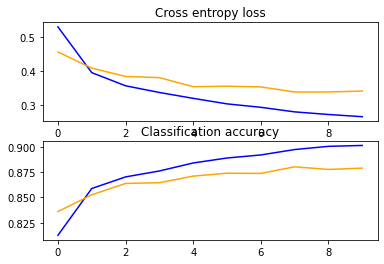

In [ ]:
#plot diagnostic learning curve

for i in range(len(histories)):
  #plot loss
  plt.subplot(211)
  plt.title('Cross entropy loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')

  # plot accuracy
  plt.subplot(212)
  plt.title('Classification accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
plt.show()

In [ ]:
print('Accuracy: %.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))

Accuracy: 88.146 std=0.450, n=5


In [ ]:
import keras
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten 
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
#load train and test dataset

#load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

#reshape dataset to have a single channel
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
testX = testX.reshape(testX.shape[0], 28, 28, 1)

#one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
#scale pixels

#convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

trainX = train_norm/255.0
testX = test_norm/255.0

In [ ]:
#evaluate model using k-fold cross-validation

scores, histories = list(), list()
n_folds=5

#prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1) 

#enumerate splits
for train_ix, test_ix in kfold.split(trainX):
  #define model
  model = Sequential()
  #modify conv2D
  model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
        input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())


  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  #compile model
  # opt = SGD(learning_rate=0.01, momentum=0.9)
  opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  #select rows for train and test
  train_dataX, train_dataY, test_dataX, test_dataY = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]

  #fit model
  history = model.fit(train_dataX, train_dataY, epochs=10, batch_size=32, validation_data=(test_dataX, test_dataY), verbose=0)

  model.save('neural_network_model.h5')
  #evaluate model
  _, acc = model.evaluate(test_dataX, test_dataY, verbose = 0)
  print('> %.3f' % (acc*100.0))

#append scores
scores.append(acc)
histories.append(history)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


> 91.333
> 91.517
> 90.942
> 91.408
> 90.300


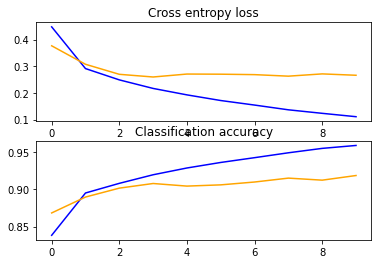

In [ ]:
#plot diagnostic learning curve

for i in range(len(histories)):
  #plot loss
  plt.subplot(211)
  plt.title('Cross entropy loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')

  # plot accuracy
  plt.subplot(212)
  plt.title('Classification accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
plt.show()

In [ ]:
print('Accuracy: %.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))

Accuracy: 91.875 std=0.000, n=1
